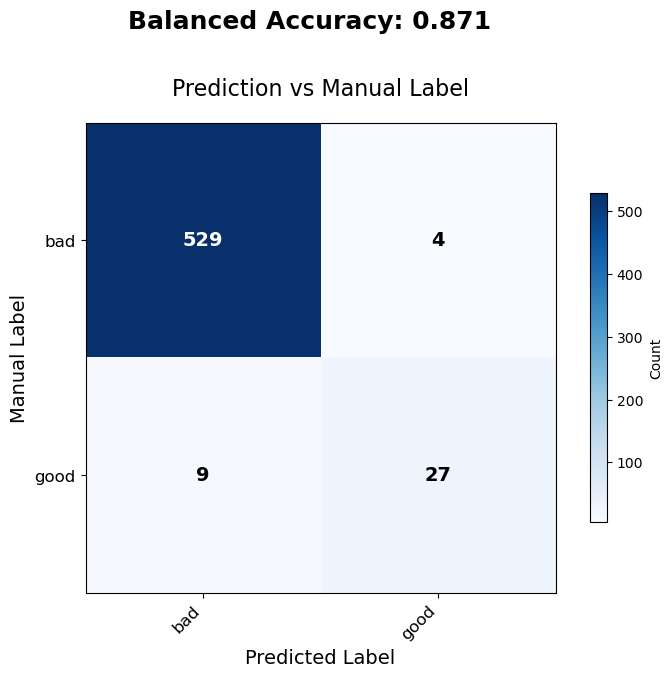

In [8]:
import pandas as pd
import sys
from pathlib import Path

sys.path.append("/home/ehefti/Github/DPQC")
import _functions.quality_control as qc

# Load the labels from the chosed directory above
label_output_dir = '/net/bs-filesvr02/export/group/hierlemann/intermediate_data/Maxtwo/phornauer/EI_iNeurons/241218/T002523/Network/well005/sorter_output'
manual_labels = pd.read_csv(Path(label_output_dir) / 'manual_unit_labels.tsv', sep='\t')
manual_labels = manual_labels['quality_label'].tolist()
manual_labels = ['good' if unit_type == 'good' else 'bad' for unit_type in manual_labels]

predictions = pd.read_csv(Path(label_output_dir) / 'labels_and_probabilities.csv', sep='\t')
predictions = predictions['prediction'].tolist()
"""
predictions = pd.read_csv(Path(label_output_dir) / 'cluster_bc_unitType.tsv', sep='\t')
predictions = predictions['bc_unitType'].tolist()
predictions = ['good' if unit_type == 'GOOD' else 'bad' for unit_type in predictions]
"""
# Plot confusion matrix
qc.plot_conf_matrix(manual_labels=manual_labels, predictions=predictions, label_classes=['bad', 'good'],
                    title='Prediction vs Manual Label', xlabel='Predicted Label', ylabel='Manual Label')

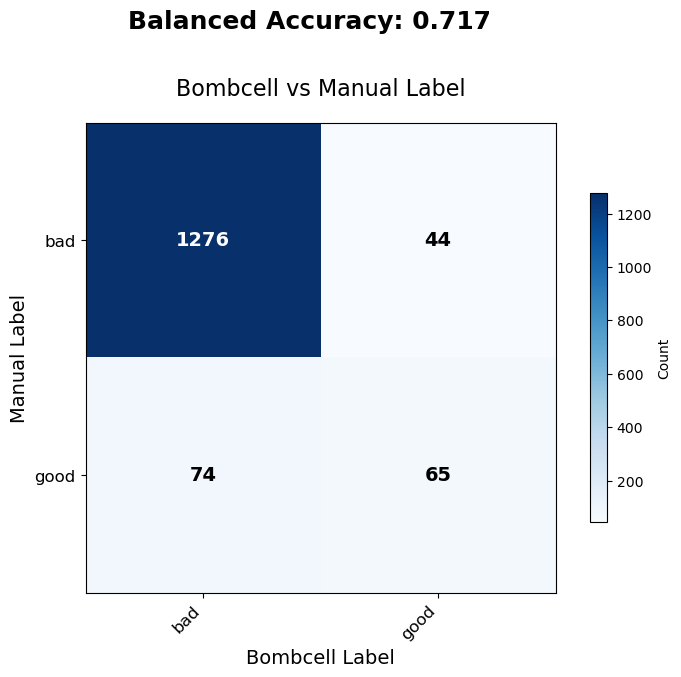

In [14]:
import pandas as pd
import sys
from pathlib import Path

sys.path.append("/home/ehefti/Github/DPQC")
import _functions.quality_control as qc

stem_path = '/net/bs-filesvr02/export/group/hierlemann/intermediate_data/Maxtwo/phornauer/EI_iNeurons/241218/T002523/Network/'
well_ids = ['well002', 'well005', 'well017']

all_manual_labels = []
all_predictions = []

for well_id in well_ids:
    label_output_dir = Path(stem_path) / well_id / 'sorter_output'
    manual_labels = pd.read_csv(Path(label_output_dir) / 'manual_unit_labels.tsv', sep='\t')
    manual_labels = manual_labels['quality_label'].tolist()
    manual_labels = ['good' if unit_type == 'good' else 'bad' for unit_type in manual_labels]

    for i in range(len(manual_labels)):
        all_manual_labels.append(manual_labels[i])
    """
    if well_id == 'well002':
        predictions = pd.read_csv(Path(label_output_dir) / 'labels_and_probabilities.csv')
    else:
        predictions = pd.read_csv(Path(label_output_dir) / 'labels_and_probabilities.csv', sep='\t')
    predictions = predictions['prediction'].tolist()
    """
    predictions = pd.read_csv(Path(label_output_dir) / 'cluster_bc_unitType.tsv', sep='\t')
    predictions = predictions['bc_unitType'].tolist()
    predictions = ['good' if unit_type == 'GOOD' else 'bad' for unit_type in predictions]
    
    for i in range(len(predictions)):
        all_predictions.append(predictions[i])


# Plot confusion matrix
qc.plot_conf_matrix(manual_labels=all_manual_labels, predictions=all_predictions, label_classes=['bad', 'good'],
                    title='Bombcell vs Manual Label', xlabel='Bombcell Label', ylabel='Manual Label')